In [1]:
import matplotlib.pyplot as plt

from unidec_modules.ChromEng2 import *

In [2]:
path = "C:\\Users\\cm19ljc\\Documents\\GitHub\\UniDec\\mzML\\mzML.mzML"
eng = ChromEngine()


UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.4.4.0

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


In [3]:
eng.load_mzml(path)

Opening HDF5 File: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.hdf5
Reading mzML: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: C:\Users\cm19ljc\Documents\GitHub\UniDec\mzML\mzML.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done


True

In [4]:
eng.config.chrom_peak_width = 0.05
eng.get_chrom_peaks()

1070 2
Noise Level: 0.03357343719702872 Window: 0.05
Bad Peak [0.419567   0.30422294] 0.23768299999999998 [0.419567, 0.65725]
Bad Peak [0.602767   0.24142904] 0.24183299999999996 [0.419567, 0.6614]
0.702967 0.14128400000000008
0.790233 0.16205000000000003
1.0312 0.13711000000000007
1.95747 0.1411800000000003
2.88835 0.13712999999999997
Bad Peak [3.76958    0.03455761] 0.8769500000000003 [3.7197, 4.59665]
Bad Peak [4.23498    0.03712807] 0.6733000000000002 [3.91918, 4.59248]
Bad Peak [5.02062    0.03889817] 0.26602000000000015 [4.77123, 5.03725]


([array([0.702967  , 0.13838679]),
  array([0.790233  , 0.09750636]),
  array([1.0312    , 0.74873995]),
  array([1.95747   , 0.88543616]),
  array([2.88835, 1.     ])],
 [[0.686333, 0.827617],
  [0.682183, 0.844233],
  [1.00212, 1.13923],
  [1.9284, 2.06958],
  [2.85927, 2.9964]])

In [5]:
TIC_min = 1
tranges = eng.chrompeaks_tranges
eng.chrompeaks_tranges = [i for i in tranges if all(j > TIC_min for j in i)]
eng.chrompeaks_tranges

[[1.00212, 1.13923], [1.9284, 2.06958], [2.85927, 2.9964]]

In [8]:
eng.config.sw_scan_offset = 0 # ??? defaults to 10

eng.add_chrom_peaks2() # stores data from selected peaks ready for metaunidec processing

Getting scans: [98, 131]
Length merge axis: 28915
Getting scans: [321, 355]
Length merge axis: 30293
Getting scans: [545, 578]
Length merge axis: 31336


In [ ]:
eng.config.subtype = 2 # background subtraction - subtract curved
eng.config.subbuff = 100 # background subtraction amount(subtract curved) 0 = 0ff, 100 = good amount when on
eng.config.datanorm = 0 # turn off data normalisation

# -- Deconvolution
eng.config.numit = 100 # number of iterations

# mass range (default = 5000.0 to 500000.0 Da)
eng.config.massub = 15000 # upper 
eng.config.masslb = 11000 # lower

eng.config.massbins = 0.1 # sample mass every 0.1 Da

# FWHM 
# eng.get_auto_peak_width()
eng.config.mzsig = 0 

# charge range
eng.config.startz = 1
eng.config.endz = 30

# smoothing 
eng.config.zzsig = 1 # charge smooth width (smooth charge state distributions)
eng.config.psig = 1 # smooth nearby points (point smooth width, some = 1)
eng.config.beta = 0 # suppress artifacts (beta, some = 50)

eng.config.psfun = 0 # Peak shape function (gaussian, lorentzian, split G/L)

# -- Peak Selection and plotting
eng.config.peaknorm = 0 # Normalise peaks (0 = off)
eng.config.datanorm = 0
eng.config.peakwindow = 100 # peak window / Da
eng.config.exnorm = 0 # extract normalisation
eng.config.peakthresh = 0.05
eng.config.nativeub = 10
eng.config.nativelb = -10

In [12]:
eng.data.export_hdf5()

In [14]:
eng.process_data()
eng.run_unidec()

Execution Time: 0.03771869999999922
Execution Time: 1.5299275000000137


{'Variable 1': 0, 'Variable 2': 0, 'beta': array([0.], dtype=float32), 'error': array([1.5117859e+10], dtype=float32), 'iterations': array([99]), 'length_mass': array([40000]), 'length_mz': array([28915]), 'mzsig': array([0.], dtype=float32), 'name': '1.00212', 'psig': array([1.], dtype=float32), 'rsquared': array([0.99012554], dtype=float32), 'scanend': 131, 'scanmid': 114.5, 'scanstart': 98, 'time': array([0.466], dtype=float32), 'timeend': 1.13923, 'timemid': 1.070675, 'timestart': 1.00212, 'uniscore': array([0.922902], dtype=float32), 'zsig': array([1.], dtype=float32)}
~


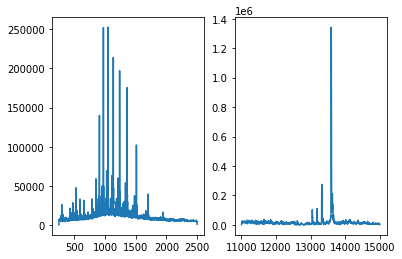

{'Variable 1': 0, 'Variable 2': 0, 'beta': array([0.], dtype=float32), 'error': array([2.295656e+10], dtype=float32), 'iterations': array([99]), 'length_mass': array([39990]), 'length_mz': array([30293]), 'mzsig': array([0.], dtype=float32), 'name': '1.9284', 'psig': array([1.], dtype=float32), 'rsquared': array([0.99028623], dtype=float32), 'scanend': 355, 'scanmid': 338.0, 'scanstart': 321, 'time': array([0.493], dtype=float32), 'timeend': 2.06958, 'timemid': 1.99899, 'timestart': 1.9284, 'uniscore': array([0.93011117], dtype=float32), 'zsig': array([1.], dtype=float32)}
~


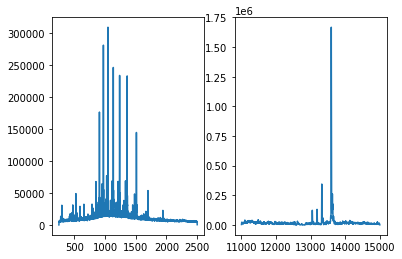

{'Variable 1': 0, 'Variable 2': 0, 'beta': array([0.], dtype=float32), 'error': array([2.029854e+10], dtype=float32), 'iterations': array([99]), 'length_mass': array([40000]), 'length_mz': array([31336]), 'mzsig': array([0.], dtype=float32), 'name': '2.85927', 'psig': array([1.], dtype=float32), 'rsquared': array([0.9938575], dtype=float32), 'scanend': 578, 'scanmid': 561.5, 'scanstart': 545, 'time': array([0.514], dtype=float32), 'timeend': 2.9964, 'timemid': 2.927835, 'timestart': 2.85927, 'uniscore': array([0.9421552], dtype=float32), 'zsig': array([1.], dtype=float32)}
~


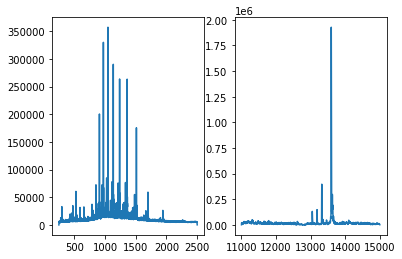

In [19]:
for s in eng.data.spectra: 
    fig, (ax1, ax2) = plt.subplots(1, 2)
    raw = s.rawdata
    massd = s.massdat
    ax1.plot(raw[:, 0], raw[:, 1])
    ax2.plot(massd[:, 0], massd[:, 1])
    print(s.attrs)
    
    print("~")
    plt.show()